In [11]:
import numpy
from matplotlib import pyplot as plt
%matplotlib inline

Locating poles and zeros of a complex function
-------------------------------

Let's construct a complex transfer function by specifying the poles, zeros and gain separately.

In [155]:
zeros = [1]
poles = [-1 + 1j, -1 - 1j]
gain = 1

In [156]:
def polynomial(roots, s):
    retval = 1
    for r in roots:
        retval *= s - r
    return retval

In [146]:
def G(s):
    return gain*polynomial(zeros, s)/polynomial(poles, s)

It will be useful for us to be able to plot a complex curve easily

In [157]:
def plotcomplex(curve, color='blue', marker=None):
    plt.plot(numpy.real(curve), numpy.imag(curve), color=color, marker=marker)

In [150]:
def plotpz():
    for p in poles:
        plotcomplex(p, color='red', marker='x')
    for z in zeros:
        plotcomplex(z, color='red', marker='o')


This function will change the axes to be a cross through the origin and have an equal aspect ratio (so that a circle appears as a circle)

In [250]:
def fixaxis(size=5):
    """ Change to cross-style axes through the origin and fix size"""
    plt.axis([-size, size, -size, size])
    ax = plt.gca()
    # from http://stackoverflow.com/questions/25689238/show-origin-axis-x-y-in-matplotlib-plot
    ax.spines['left'].set_position('zero')

    # turn off the right spine/ticks
    ax.spines['right'].set_color('none')
    ax.yaxis.tick_left()

    # set the y-spine
    ax.spines['bottom'].set_position('zero')

    # turn off the top spine/ticks
    ax.spines['top'].set_color('none')
    ax.xaxis.tick_bottom()
    
    # Set axis to equal aspect ratio
    ax.set_aspect('equal')

Let's construct a circular contour and see how the image of the contour moves around as the contour moves around. The image is $G(s)$ as $s$ goes through a countour

In [251]:
from ipywidgets import interact

In [253]:
def plotsituation(contour):
    plotcomplex(contour)
    plotcomplex(G(contour), color='red')
    plotpz()
    fixaxis()

In [254]:
theta = numpy.linspace(0, 2*numpy.pi, 1000)

In [256]:
def argumentprinciple(centerreal=(-2., 2.), centerimag=(-2., 2.), radius=(0.5, 3)):
    contour = radius*numpy.exp(1j*theta) + centerreal + 1j*centerimag
    plotsituation(contour)    

<function __main__.argumentprinciple>

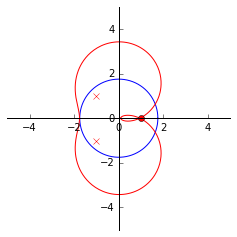

In [257]:
interact(argumentprinciple)

You should be able to verify the Cauchy argument principle using the interaction above:

As $s$ describes a simple contour enclosing $N_p$ poles and $N_z$ zeros, the image $G(s)$ encircles the origin $w = N_z - N_p$ times. $w$ is the [winding number](https://en.wikipedia.org/wiki/Winding_number).

Closed loop stability
---------------------
Normally we will be looking at transfer functions of the form

$$\frac{GK}{1 + GK}$$

So we will want to check if the denominator of the above $(1 + GK)$ has roots in the RHP. To do this we can construct a special contour called the Nyquist D contour which encloses the whole of the RHP. It starts at the origin, then goes up to infinity, circles around at infinite distance from the origin in a clockwise direction, and then comes back up the imaginary axis.  For most functions, the part at infinity just maps $1 + GK$ to 1 as $GK$ goes to zero as s goes to infinity.

 

In [199]:
omega = numpy.logspace(-2, 2, 1000)
Dcontour = numpy.concatenate([1j*omega, -1j*omega[::-1]]) # We're ignoring the infinite arc

Let's assume that $K=1$ and check if our system will be closed loop stable

In [200]:
K = 1

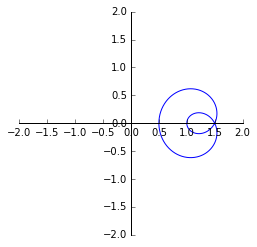

In [201]:
plotcomplex(K*G(Dcontour) + 1)
fixaxis(2)

Counting encirclements of the origin of $1 + GK$ is the same as counting encirclements of $-1$ by $GK$:

In [208]:
def nyquistplot(K):
    plotcomplex(K*G(Dcontour))
    plotcomplex(-1, color='red', marker='o')
    fixaxis(size=2)

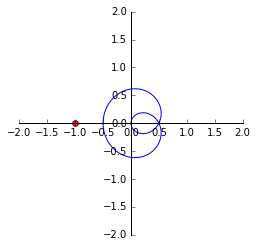

In [209]:
nyquistplot(K=1)

This enables us to reason easily about the effect of the controller gain on stability:

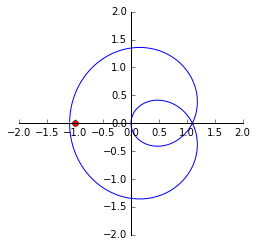

In [210]:
interact(nyquistplot, K=(0.5, 5.))

Nyquist stability criterion
---------------------------

Let $N_P$ be the number of poles of KG(s) encircled by the D contour and $N_Z$ be the number of zeros of $1+KG(s)$ encircled by the D contour. $N_Z$ is the number of poles of the closed loop system in the right half plane. The resultant image shall encircle (clock-wise) the point $(-1+j0)$ $w$ times such that $w = N_Z - N_P$.

For a stable $G$ this boils down to spotting when the Nyquist plot encircles the -1 point.

Bode stability criterion
------------------------

Nyquist plots are hard to draw by hand, though, so we often use the Bode stability criterion instead. This works by noticing that, in order for the Nyquist graph to encircle the -1 point, the phase angle must reach -180 ° and the magnitude must be bigger than 1. We can draw a Bode diagram and a Nyquist diagram next to each other to see the effect of changing gains.

In [248]:
def bodeplot(K):
    plt.figure(figsize=(10,5))
    freqresp = K*G(1j*omega)
    plt.subplot(2, 2, 1)
    plt.loglog(omega, numpy.abs(freqresp))
    plt.ylim([0.1, 10])
    plt.axhline(1)
    plt.subplot(2, 2, 3)
    plt.semilogx(omega, numpy.unwrap(numpy.angle(freqresp)) - numpy.angle(freqresp[0])) # We know the angle should start at 0
    plt.axhline(-numpy.pi)
    plt.subplot(1, 2, 2)
    nyquistplot(K)

<function __main__.bodeplot>

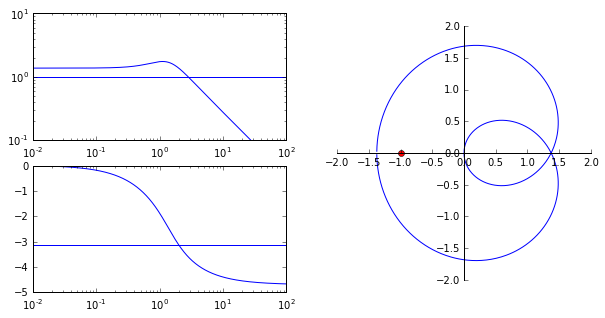

In [249]:
interact(bodeplot, K=(0.5, 5.))